# HDF5 python #

This jupter script is for reading and converting hdf5 files


In [1]:
import h5py
f = h5py.File('D:\CUHK\Data_from_zcao\struct03_snap38.h5', 'r')
list(f.keys())


['bounded_region',
 'clump_vertex_coord',
 'gas_density',
 'grav_pot',
 'i_mag_field',
 'i_velocity',
 'j_mag_field',
 'j_velocity',
 'k_mag_field',
 'k_velocity']

In [23]:
import numpy as np
B_i = np.array(f['i_mag_field'])
B_j = np.array(f['j_mag_field'])
B_k = np.array(f['k_mag_field'])
print(B_i.shape, B_j.shape, B_k.shape[1])
type(B_i)

(31, 130, 25) (31, 130, 25) 130


numpy.ndarray

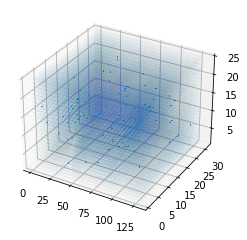

In [26]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

x, y, z = np.meshgrid(np.linspace(1, B_i.shape[1], B_i.shape[1]),
                      np.linspace(1, B_i.shape[0], B_i.shape[0]),
                      np.linspace(1, B_i.shape[2], B_i.shape[2]))
# this is a strange thing: the mesh grid data is not mathched with the original order
# x, y, z = np.meshgrid(31, 130, 25) ====> x.shape = (130, 31, 25) 

ax.quiver(x, y, z, B_i, B_j, B_k, length=0.001)

plt.show('agg')

## draw the 3d Isosurface 

$$|B| = \sqrt{B_iB^i}$$

C:\Users\Shibo\AppData\Local\Temp/ipykernel_15880/1856867207.py:4: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  verts, faces, _, _ = marching_cubes_lewiner(B_mag, iso_val, spacing=(0.1, 0.1, 0.1))


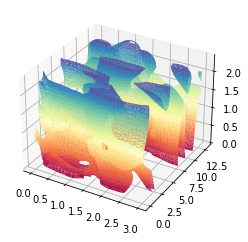

In [35]:
from skimage.measure import marching_cubes_lewiner
B_mag = np.sqrt(B_i*B_i + B_j*B_j + B_k*B_k)
iso_val=np.mean(B_mag)
verts, faces, _, _ = marching_cubes_lewiner(B_mag, iso_val, spacing=(0.1, 0.1, 0.1))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], cmap='Spectral',
                lw=1)
plt.show('agg')
